# Project 2 -- Lukas Anell

## Question 1

In [1]:
library(data.table)
myDF <- as.data.frame(fread("/anvil/projects/tdm/data/movies_and_tv/rotten_tomatoes_movies.csv"))
myDF <- myDF[ , !names(myDF) %in% c("cast", "movie_info")]
dim(myDF)

[1] 16638    21

In [2]:
ratingTable <- table(myDF$rating)
head(ratingTable)


     G   NC17     NR     PG  PG-13 PG-13) 
   652     37   4862   2062   2885      3 

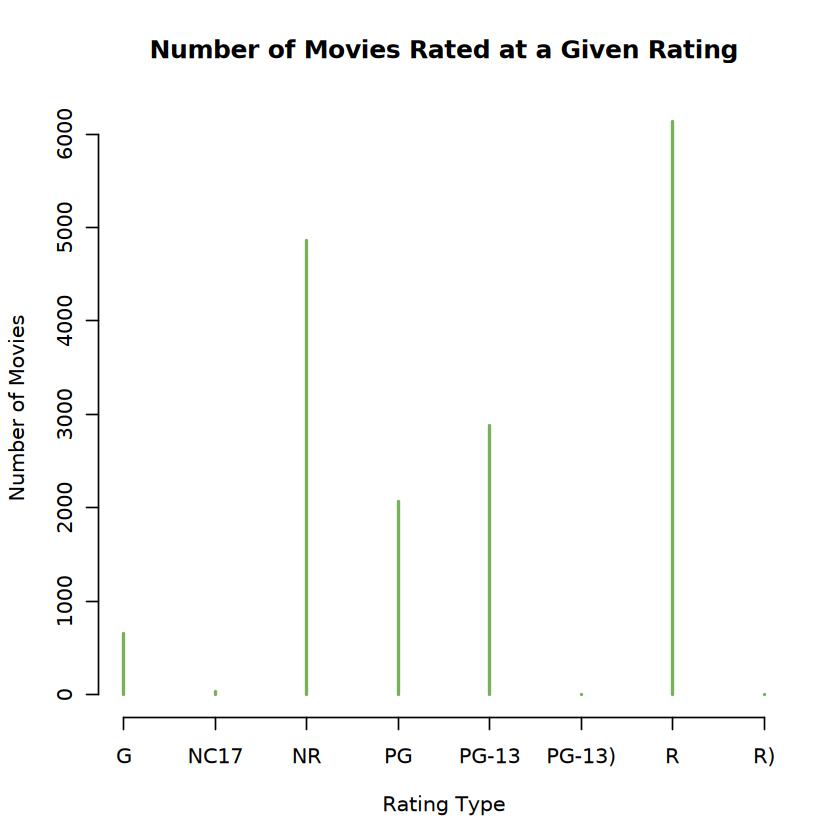

In [3]:
plot(
    ratingTable,
    main="Number of Movies Rated at a Given Rating",
    xlab="Rating Type",
    ylab="Number of Movies",
    col="#78b159"
)

When trying out the given command in this question, I found that it doesn't work as expected.
After playing around with it for some time, I found out that I have to go back to using the `seminar` kernel instead of `seminar-r`.
I liked playing around with the plot, and figuring out how to use the different parameters by looking at the documentation. I chose my favorite color for the colors of the line plots.
I also noticed that when printing out the different rating types, it didn't show all of them, so I was surprised when the plot had more types than I thought.

I actually went back afterwards and used a fix that I saw from piazza, where they just converted the data.table to a data.frame, but I still thought it was interesting.

## Question 2

In [4]:
directorTable <- table(myDF$directors[myDF$directors != ""])
head(directorTable)


        A. Dean Bell A. Edward Sutherland         A.J. Edwards 
                   1                    1                    1 
          A.T. White           AJ Schnack           Aamir Khan 
                   1                    1                    1 

In [5]:
length(ratingTable)

[1] 8

In [6]:
length(directorTable)

[1] 8314

In [7]:
studioTable <- table(myDF$studio_name)
length(studioTable)

[1] 2887

In [8]:
tail(sort(directorTable), n=1)


Woody Allen 
         36 

In [9]:
tail(sort(studioTable), n=1)


Paramount Pictures 
               497 

I was having trouble with tables in Question 1, but I think I've started to understand how to use them more in this question. I though the syntax for excluding empty strings from the table was very interesting too.
Other than that, this was all pretty standard stuff we've learned before.

## Question 3

In [10]:
genreTable <- table(myDF$genre)
tail(sort(genreTable))


   Documentary, Special Interest Art House & International, Drama 
                             540                              571 
       Drama, Mystery & Suspense                    Comedy, Drama 
                             683                              819 
                          Comedy                            Drama 
                            1202                             1727 

In [11]:
sum(myDF$genre == "Comedy")

[1] 1202

In [12]:
head(grepl("Comedy", myDF$genre))

[1]  TRUE  TRUE  TRUE FALSE FALSE FALSE

In [13]:
head(grep("Comedy", myDF$genre))

[1]  1  2  3  9 15 23

In [14]:
sum(grepl("Comedy", myDF$genre))

[1] 5385

In [15]:
length(grep("Comedy", myDF$genre))

[1] 5385

In [16]:
mixedComedy <- myDF$genre[grepl("Comedy", myDF$genre) & (myDF$genre != "Comedy")]
tail(sort(table(mixedComedy)), n=1)

mixedComedy
Comedy, Drama 
          819 

In [17]:
length(mixedComedy)

[1] 4183

In [18]:
sum(myDF$genre == "Romance")

[1] 14

In [19]:
mixedRomance <- myDF$genre[grepl("Romance", myDF$genre) & (myDF$genre != "Romance")]
length(mixedRomance)

[1] 1793

In [20]:
sum(grepl("Romance", myDF$genre))

[1] 1807

I was a little confused about printing out when the genre is "Comedy" is TRUE, so I had made an extra boolean statement `==TRUE`, but I realized that it outputted the same thing as my current boolean statement, so I don't actually need it.
I like what both `grepl()` and `grep()` do, it seems very useful to see the results where "Comedy" is listed, but not the only Genre, and of course seeing the row numbers where this happens is very nice.
The big grep statement is very interesting; I don't fully understand it, but I assume it's filtering out rows that are only designated as comedy, but not if they have more genres than comedy.

## Question 4

In [21]:
ratingTable


     G   NC17     NR     PG  PG-13 PG-13)      R     R) 
   652     37   4862   2062   2885      3   6136      1 

In [22]:
myDF$rating[myDF$rating == "R)"] <- "R"
myDF$rating[myDF$rating == "PG-13)"] <- "PG-13"
ratingTable <- table(myDF$rating)
ratingTable


    G  NC17    NR    PG PG-13     R 
  652    37  4862  2062  2888  6137 

In [23]:
tomatometerStatusTable <- table(myDF$tomatometer_status)
tomatometerStatusTable


Certified Fresh           Fresh          Rotten 
           2957            6448            7233 

In [24]:
table_data <- table(myDF$rating, myDF$tomatometer_status)
head(table_data)

       
        Certified Fresh Fresh Rotten
  G                 124   336    192
  NC17                7    19     11
  NR                576  3081   1205
  PG                376   753    933
  PG-13             563   593   1732
  R                1311  1666   3160

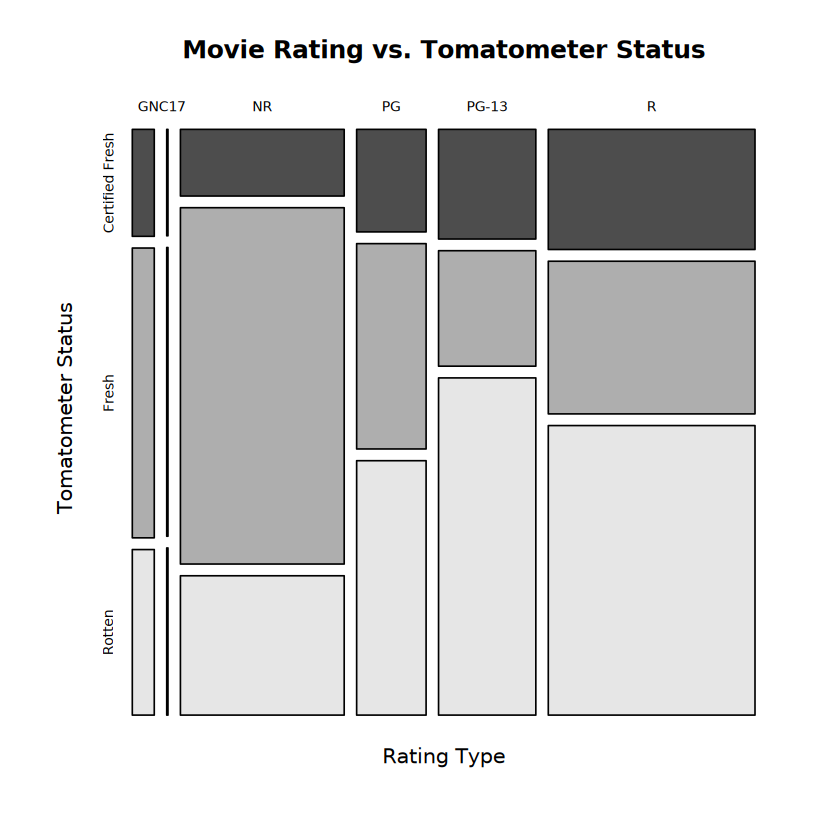

In [25]:
plot(
    table_data,
    main="Movie Rating vs. Tomatometer Status",
    xlab="Rating Type",
    ylab="Tomatometer Status",
    col= TRUE
)

I like how easy it is to create multi-dimensional tables, and I also like how the data is presented, but I'm curious how it would look with more than 2 dimensions. (I just tried it after writing this and it looks very weird, which is understandable)
I tried both `plot()` and `mosaicplot()` on `table_data`, and they looked the same, so I'm not sure why I would call `mosaicplot()` here instead of `plot()`.
By reading the documentation for `mosaicplot()`, I found that I can easily give the plot a different color per tomatometerStatus by passing in `TRUE` to the `color` parameter, as it "[uses a gamma-corrected grey palette](https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/mosaicplot)".
I also tried out plotting 3 dimensions, as I saw in the documentation that you can do X-Y-Z plotting, but it looked really weird, so I'm guessing you'd need a different type of data.

## Question 5

In [26]:
mergedRatingTomatometer <- paste(myDF$rating, myDF$tomatometer_status)
head(mergedRatingTomatometer)

[1] "PG Rotten"          "R Certified Fresh"  "R Fresh"           
[4] "NR Certified Fresh" "G Fresh"            "PG-13 Rotten"

In [29]:
subsetFreshAndR <- subset(myDF, rating=="R" & tomatometer_status=="Fresh")
head(subsetFreshAndR)

,rotten_tomatoes_link,movie_title,critics_consensus,poster_image_url,rating,genre,directors,writers,in_theaters_date,on_streaming_date,...,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<IDate>,<IDate>,...,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
3,/m/10,10,,https://resizing.flixster.com/mF0dxH6UTa0FdkMsfTjUax_VG-Q=/206x305/v1.bTsxMTI5MTE2MTtqOzE4MzEwOzEyMDA7MTUzNjsyMDQ4,R,"Comedy, Romance",Blake Edwards,Blake Edwards,1979-10-05,1997-08-27,...,Waner Bros.,Fresh,68,22,Spilled,53,14670,2,15,7
12,/m/1000224-accused,The Accused,,https://resizing.flixster.com/e_mAD3lB2uIV0-V0m-FE2Dl4Pqw=/206x305/v1.bTsxMTI5MTI0OTtqOzE4MzEwOzEyMDA7OTAwOzEyMDA,R,"Drama, Mystery & Suspense",Jonathan Kaplan,Tom Topor,1988-10-14,2002-04-16,...,Paramount Pictures,Fresh,91,22,Upright,79,20796,1,20,2
18,/m/10003276-criminal,Criminal,"If you saw Nine Queens, it may feel redundant, but the snappy performances make it fun to watch.",https://resizing.flixster.com/VctxdswBXj4IgRw_59c4ONT0xnQ=/206x305/v1.bTsxMTIwOTc1OTtqOzE4MzA5OzEyMDA7MTUzNjsyMDQ4,R,"Drama, Mystery & Suspense","Greggory Jacobs, Gregory Jacobs, Greg Jacobs","Gregory Jacobs, Fabin Bielinsky, Steven Soderbergh, Sam Lowry, Greggory Jacobs, Greg Jacobs",2004-09-24,2005-04-12,...,Warner Bros. Pictures,Fresh,69,124,Spilled,57,6702,36,85,39
23,/m/10003925-dead_end,Dead End,,https://resizing.flixster.com/xe8wB-pFYcOByS1U1AlGUTxj9zs=/206x305/v1.bTsxMTI5NTA5MztqOzE4MzEwOzEyMDA7MTUzNjsyMDQ4,R,"Comedy, Horror, Mystery & Suspense","Jean-Baptiste Andrea, Fabrice Canepa, Jean-Bapiste Andrea","Jean-Baptiste Andrea, Fabrice Canepa",2003-09-26,2004-11-19,...,LionsGate Entertainment,Fresh,75,8,Upright,60,10351,1,6,2
24,/m/10004050-bandwagon,Bandwagon,,https://resizing.flixster.com/BOU_Gk_ACknlP0D8lRZTQJDd4yg=/206x305/v1.bTsxMTYyMzAwODtqOzE4MzE0OzEyMDA7NjY2Ozk4MQ,R,Comedy,John Schultz,John Schultz,1997-09-12,1999-02-16,...,Avalanche Entertainment,Fresh,80,5,Upright,91,386,1,4,1
32,/m/10004635-home_of_the_brave,Home of the Brave,,https://resizing.flixster.com/e60xz8z1qD75JyWYmLFdDwzb7zk=/206x305/v1.bTsxMTYxNzM5MztqOzE4MzE0OzEyMDA7NDMyOzU3Ng,R,"Action & Adventure, Documentary, Drama, Special Interest",Paola di Florio,Paola di Florio,2004-05-11,2007-10-23,...,Emerging Pictures,Fresh,93,15,Spilled,48,866,7,14,1


In [32]:
subsetFavMovie <- subset(myDF, movie_title=="Cars" | movie_title=="Interstellar")
head(subsetFavMovie)

,rotten_tomatoes_link,movie_title,critics_consensus,poster_image_url,rating,genre,directors,writers,in_theaters_date,on_streaming_date,...,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<IDate>,<IDate>,...,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
4119,/m/cars,Cars,"Cars offers visual treats that more than compensate for its somewhat thinly written story, adding up to a satisfying diversion for younger viewers.",https://resizing.flixster.com/UJMEfnjBwgLRtUijPa5JEI0plcA=/206x305/v1.bTsxMTI5NTIwOTtqOzE4MzEwOzEyMDA7MjEwMDsyODAw,G,"Action & Adventure, Animation, Comedy, Kids & Family","John Lasseter, Joe Ranft","John Lasseter, Dan Fogelman, Joe Ranft, Kiel Murray, Phil Lorin, Jorgen Klubien",2006-06-09,2006-11-07,...,Buena Vista,Certified Fresh,75,200,Upright,79,877830,48,149,51
7949,/m/interstellar_2014,Interstellar,"Interstellar represents more of the thrilling, thought-provoking, and visually resplendent filmmaking moviegoers have come to expect from writer-director Christopher Nolan, even if its intellectual reach somewhat exceeds its grasp.",https://resizing.flixster.com/wPllQbE6ho1sxFzNiGPWwwCHe9M=/206x305/v1.bTsxMTE5MDg2MDtqOzE4MzA5OzEyMDA7ODAwOzEyMDA,PG-13,"Action & Adventure, Science Fiction & Fantasy",Christopher Nolan,"Christopher Nolan, Jonathan Nolan",2014-11-07,2015-03-31,...,Paramount Pictures,Certified Fresh,72,350,Upright,85,174493,58,252,98


I'm a little confused about what the `paste()` function actually does, I'm not entirely sure what merging the columns does, and the printout is a little confusing. I'm sure as I use it more it'll make more sense.
The subset function is very nice though, I like how easy it is to use with logical operators.
I'm not sure if I did 5.3 correctly, but I think so?

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.

https://www.purdue.edu/odos/osrr/honor-pledge/
